In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 미로 구현
초기상태

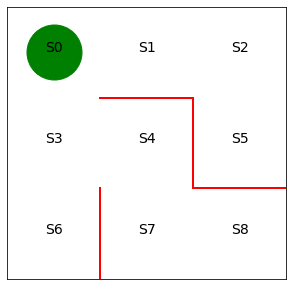

In [3]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#붉은 벽 그리기
plt.plot([1,1],[0,1], color='red', linewidth=2)
plt.plot([1,2],[2,2], color='red', linewidth=2)
plt.plot([2,2],[2,1], color='red', linewidth=2)
plt.plot([2,3],[1,1], color='red', linewidth=2)

#상태 문자열 표시
plt.text(0.5, 2.5, 'S0', size=14, ha = 'center')
plt.text(1.5, 2.5, 'S1', size=14, ha = 'center')
plt.text(2.5, 2.5, 'S2', size=14, ha = 'center')
plt.text(0.5, 1.5, 'S3', size=14, ha = 'center')
plt.text(1.5, 1.5, 'S4', size=14, ha = 'center')
plt.text(2.5, 1.5, 'S5', size=14, ha = 'center')
plt.text(0.5, 0.5, 'S6', size=14, ha = 'center')
plt.text(1.5, 0.5, 'S7', size=14, ha = 'center')
plt.text(2.5, 0.5, 'S8', size=14, ha = 'center')

# x,y축 범위 설정 및 눈금 제거
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both',bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

#시작점 표시
line, = ax.plot([0.5],[2.5], marker='o', color='g', markersize=55)

### 에이전트 구현

In [4]:
#정책을 결정하는 파라미터의 초깃값 theta_0을 설정
#row - 상태0~7, col - 행동(상,우,하,좌)

theta_0 = np.array([[np.nan, 1, 1, np.nan], #S0일 때 가능한 행동이면 1, 가능하지 않은 방향이면 nan
                     [np.nan, 1, np.nan, 1], #S1
                     [np.nan, np.nan, 1, 1], #S2
                     [1, 1, 1 , np.nan], #S3
                     [np.nan, np.nan, 1, 1], #4
                     [1, np.nan, np.nan, np.nan], #S5
                     [1, np.nan, np.nan, np.nan], #S6
                     [1, 1, np.nan, np.nan] #S7
                    ]) #S8은 목표지점이기 때문에 정책 없음

In [5]:
#정책 파라미터 theta를 행동 정책 pi로 변환하는 함수

def simple_convert_into_pi_from_theta(theta):
    #단순히 값의 비율을 계산해 확률로 삼는 예시
    [m,n] = theta.shape #theta의 행렬 크기를 구함
    pi = np.zeros((m,n))
    for i in range(0,m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i,:]) #비율계산
    pi = np.nan_to_num(pi) #nan을 0으로 변환
    
    return pi

In [6]:
#초기 정책 pi_0을 계산
pi_0 = simple_convert_into_pi_from_theta(theta_0)

print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [7]:
#한 단계 이동 후의 상태 s_next를 계산하는 함수

def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :]) #pi [s,:]의 값에 따라 direction 값이 결정됨
    
    if next_direction == 'up':      s_next = s - 3
    elif next_direction == 'right': s_next = s + 1
    elif next_direction == 'down':  s_next = s + 3
    elif next_direction == 'left':  s_next = s - 1
    #next_direction에 따라 현재 상태가 변함
    
    return s_next

In [8]:
#목표 지점에 이를 때까지 에이전트를 이동시키는 함수

def goal_maze(pi):
    s = 0 #시작 지점
    state_history = [0]
    
    while(1):
        next_s = get_next_s(pi,s)
        state_history.append(next_s)
        
        if next_s == 8: break #목표지점에 이르면 while문 중단
        else: s = next_s #아직 도달 안했으면 s 업데이트
        
    return state_history

In [9]:
#실제로 경로 이동 히스토리 저장해보기
state_history = goal_maze(pi_0)

현재 1단계, pi값은 [[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]
현재 2단계, pi값은 [[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]
현재 3단계, pi값은 [[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.    

In [11]:
#결과 출력하기
print('목표 지점에까지 걸린 단계의 수는 '+str(len(state_history)-1)+'단계 입니다.')
print(state_history)

목표 지점에까지 걸린 단계의 수는 26단계 입니다.
[0, 1, 2, 5, 2, 1, 0, 1, 0, 1, 0, 1, 0, 3, 6, 3, 0, 1, 0, 1, 0, 3, 0, 3, 4, 7, 8]


### 정책경사 알고리즘에 따라 에이전트 이동시키기

In [34]:
#정책 파라미터 theta를 행동정책 pi로 변환하는 함수에 소프트맥스 함수 사용

def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m,n] = theta.shape
    pi = np.zeros((m,n))

    exp_theta = np.exp(beta*theta)
    
    for i in range(0,m):
        pi[i,:] = exp_theta[i,:] / np.nansum(exp_theta[i,:])
    
    pi = np.nan_to_num(pi)
    return pi


#초기정책 pi_0 을 계산
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [35]:
#행동 a와 한단계 후의 상태 s를 구하는 함수

def get_action_and_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :]) #pi [s,:]의 값에 따라 direction 값이 결정됨
    
    if next_direction == 'up':      
        action = 0
        s_next = s - 3
    elif next_direction == 'right': 
        action = 1
        s_next = s + 1
    elif next_direction == 'down':  
        action = 2
        s_next = s + 3
    elif next_direction == 'left':  
        action = 3
        s_next = s - 1
        #next_direction에 따라 현재 상태가 변함
    
    return [action, s_next]

In [36]:
#목표 지점에 이를 때까지의 상태와 행동의 히스토리를 출력한다

def goal_maze_ret_s_a(pi):
    s = 0 #시작 지점
    s_a_history = [[0, np.nan]] #agent의 행동 및 상태의 히스토리를 기록
    
    while(1):
        [action, next_s] = get_action_and_next_s(pi,s)
        s_a_history[-1][1] = action #현재 상태를 히스토리에 추가
        
        s_a_history.append([next_s, np.nan]) #다음 상태 저장(액션은 아직미정이므로 nan)
        
        if next_s == 8: break #목표지점에 이르면 while문 중단
        else: s = next_s #아직 도달 안했으면 s 업데이트
        
    return s_a_history

In [37]:
#초기정책으로 미로를 빠져나오기

s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print('걸린 단계 수는',len(s_a_history)-1,"단계 입니다.")

[[0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
걸린 단계 수는 12 단계 입니다.


In [44]:
#theta를 수정하는 함수 with정책 경사 알고리즘

def update_theta(theta, pi, s_a_history):
    eta = 0.1 #학습률
    T = len(s_a_history) - 1 #목표지점까지 걸린 단계 수
    
    [m,n] = theta.shape
    delta_theta = theta.copy() #theta의 변화값 구할 준비. 포인터로 참조(빠른 계산을 위함)
    
    #delta_theta를 요소 단위로 계산
    for i in range(0,m):
        for j in range(0,n):
            if not(np.isnan(theta[i,j])): #theta가 nan이 아닌 경우
                SA_i = [SA for SA in s_a_history if SA[0] == i] #히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션
                SA_ij = [SA for SA in s_a_history if SA == [i,j]] #상태 i에서 행동j를 취한 경우만 모음
                
                N_i = len(SA_i) #상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij) #상태 i에서 행동 j를 취한 횟수
                
                delta_theta[i,j] = (N_ij - pi[i,j]*N_i) / T
    
    new_theta = theta + eta * delta_theta
    return new_theta


#정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49375033 0.50624967 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33054408 0.33891184 0.33054408 0.        ]
 [0.         0.         0.50624967 0.49375033]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49375033 0.50624967 0.         0.        ]]


In [45]:
#정책 경사 알고리즘으로 미로 빠져나오기

stop_epsilon = 10**-4 #정책의 변화가 이보다 작아지면 학습을 종료하겠다는 뜻

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi) #정책 pi를 따라 미로를 탐색한 히스토리를 구함
    new_theta = update_theta(theta, pi, s_a_history) #파라미터 세타를 수정
    new_pi = softmax_convert_into_pi_from_theta(new_theta) #정책 pi를 다시수정
    
    change_amount = np.sum(np.abs(new_pi - pi))
    print(change_amount) #정책 변화 얼만큼됐나
    print(count,'번째 루프, 목표 지점에 이르기까지 걸린 단계 수는',len(s_a_history)-1, '단계입니다.')
    
    if change_amount<stop_epsilon :
        is_continue= False
    else: 
        theta = new_theta
        pi = new_pi
        count += 1
    

0.009274861285569314
1 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 118 단계입니다.
0.012444588682849367
2 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 84 단계입니다.
0.014011152933675497
3 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 46 단계입니다.
0.011990538537316908
4 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 58 단계입니다.
0.011757031172729915
5 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 56 단계입니다.
0.027139878703052622
6 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.011511339598220649
7 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 40 단계입니다.
0.004643906861422964
8 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 74 단계입니다.
0.014495580810582998
9 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 14 단계입니다.
0.008009693380118144
10 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 90 단계입니다.
0.009695242186634756
11 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 54 단계입니다.
0.008112475430391564
12 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 92 단계입니다.
0.03957833433084962
13 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.008410710154078072
14 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 118 단계입니다.
0.0185885920090485
15 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 10 단계입니다.
0.02057221205154036
16 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.0141

0.0198317037845763
164 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 50 단계입니다.
0.030076626173704324
165 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.013650179221840808
166 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 10 단계입니다.
0.03350814480172959
167 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.01404562660811906
168 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 20 단계입니다.
0.03306713811880882
169 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.025001220717753875
170 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.011263445130988647
171 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 24 단계입니다.
0.014474555160270297
172 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 26 단계입니다.
0.019280325664252917
173 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.015651873828521373
174 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 16 단계입니다.
0.012895875395614514
175 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 16 단계입니다.
0.03223619187471888
176 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.02808078443782569
177 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.03224827747696832
178 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 10 단계입니다.
0.021165139627744495
179 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 1

0.018948564105821547
383 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.012871433148747807
384 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.018612321799221093
385 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.02289195518692888
386 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.027944847513759502
387 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 10 단계입니다.
0.02079935357696347
388 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.01435357971856352
389 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 20 단계입니다.
0.022700326832628903
390 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.01298103407211676
391 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.01819154274318363
392 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 28 단계입니다.
0.015527124034599882
393 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 14 단계입니다.
0.025229196566537798
394 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.018394802931357118
395 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.01813158377409299
396 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.01787285871228725
397 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.01701143815636308
398 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입

0.008365222389803209
630 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.010716034820340337
631 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.013024446885142232
632 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 10 단계입니다.
0.007693112383424169
633 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.007608769083968847
634 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0075256792459704736
635 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0074438207504902015
636 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.007363171893669557
637 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.011396860646577245
638 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.011386764907007282
639 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.010523886780645447
640 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.007281562774221206
641 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.007203283275053221
642 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.016223032183823663
643 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.0071717467079350505
644 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.01197483171621505
645 번째 루프, 목표 지점에 이르기까지 걸린 단계 수

0.0030281903635271876
889 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.01062260809856505
890 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 12 단계입니다.
0.003011080366151095
891 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0029883474559176254
892 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0029658616992977727
893 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0029436196432908457
894 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0029216178930370276
895 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00289985311069315
896 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0077597567853377805
897 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.0029192459669589027
898 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0028975045918167436
899 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.018531318539745344
900 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 14 단계입니다.
0.007567080520798797
901 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.002948280104357985
902 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0029262208709736476
903 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0029043994695399436
904 번째 루프, 목표 지점에 이르기까지 

0.0057778340113105245
1149 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 8 단계입니다.
0.0016167589845316188
1150 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0016074156611994433
1151 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.001598151954951249
1152 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0015889669731265904
1153 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00499137870807323
1154 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.001601145482395358
1155 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00504692053984418
1156 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0016142537825270184
1157 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0016048509504328554
1158 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0015955293243647903
1159 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0015862879769586863
1160 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.010109008647754755
1161 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 16 단계입니다.
0.004496282366698814
1162 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.004561117795360642
1163 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0016122412351564225
1164 번째 루프,

1429 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0010211868051570386
1430 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.003452766266781815
1431 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0010238525561707158
1432 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0010190366375006747
1433 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.004039590091334658
1434 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0010307763488308294
1435 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0031719038059646425
1436 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0010339670602217167
1437 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0010290637234143564
1438 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0010241951651464333
1439 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.001019361056445612
1440 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.004066157261365968
1441 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.001031450482840316
1442 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0010265386255627375
1443 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0010216618744775564
1444 번째 루프, 목표 지점에 이르기까지 걸린 단계

0.000780554962681701
1717 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0007773266151719985
1718 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0007741181478223766
1719 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00322194692986753
1720 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0007803045844887446
1721 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000777075507083478
1722 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0033631725317651504
1723 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0007848307432595861
1724 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000781565503311786
1725 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.003413800045418823
1726 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0007898762281814374
1727 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000786569549910035
1728 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000783283554421383
1729 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00835888953798829
1730 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.000783820032817413
1731 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0007805617195142008
1732 번째 루프, 목표

0.0023079348226687536
2002 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0005613568361242868
2003 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005593651179882295
2004 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005573839849992712
2005 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005554133622274471
2006 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005534531754042733
2007 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0027735377274689804
2008 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.000559483962191791
2009 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005574985066335095
2010 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005555236144555616
2011 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005535592107518104
2012 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005516052212764314
2013 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005496615724414344
2014 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000547728191308168
2015 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005458050055804978
2016 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0005438919435975728
2017 

0.00036621363544356647
2279 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00036515807035714803
2280 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00036410707303399445
2281 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0003630606170858877
2282 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00036201867631598106
2283 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0003609812247172481
2284 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0003599482364673931
2285 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0003589196859339269
2286 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00035789554766505263
2287 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0003568757963941134
2288 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0003558604070331775
2289 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00035484935467622325
2290 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00035384261459312297
2291 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00035284016223188774
2292 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0003518419732135361
2293 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000350848023334

0.000297984880569091
2563 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00029720204074841147
2564 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00029642230322023816
2565 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00029564565151452005
2566 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00029487206926933143
2567 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00029410154023287033
2568 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002933340482600723
2569 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002925695773148135
2570 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002918081114638392
2571 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002910496348827764
2572 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002902941318506033
2573 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00028954158674920905
2574 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002887919840640664
2575 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0016561199654952091
2576 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0002912917795483555
2577 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000290536745413280

0.00024066527933374986
2850 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00024008661915237393
2851 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002395100899217073
2852 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002389356809610766
2853 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023836338165787903
2854 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023779318146754068
2855 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023722506991243585
2856 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023665903658099362
2857 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023609507112865545
2858 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023553316327513084
2859 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023497330280673918
2860 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002344154795730826
2861 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023385968348922127
2862 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023330590453142681
2863 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023275413274163534
2864 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00023220435

0.00020997966513823518
3129 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020950133031912357
3130 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020902467926017278
3131 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020854970383468382
3132 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.01756133225808659
3133 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 10 단계입니다.
0.0002090282220550549
3134 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020855435385564065
3135 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020808214368029168
3136 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020761158358084675
3137 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020714266565600992
3138 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0002066753820513783
3139 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020620972496483703
3140 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020574568663733923
3141 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020528325936079728
3142 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00020482243547233908
3143 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000204363207

0.00015390781628452262
3388 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015361142255195318
3389 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015331590425282995
3390 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015302125786092503
3391 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015272747986628914
3392 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015243456677797688
3393 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015214251512390108
3394 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0001518513214486105
3395 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015156098231365427
3396 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015127149430033474
3397 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0001509828540059762
3398 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015069505804513744
3399 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00015040810305001068
3400 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0001501219856705656
3401 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.001125624361247607
3402 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.0001513785118

0.00011958415092036892
3668 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0001193821264958081
3669 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0001191806236753544
3670 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00011897964062771056
3671 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0001187791755295764
3672 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00011857922656463397
3673 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00011837979192648104
3674 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.006181062409844567
3675 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 6 단계입니다.
0.00011943475852736057
3676 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00011923369511985908
3677 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00011903314805008364
3678 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00011883311551745893
3679 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0001186335957288117
3680 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.0001184345869002807
3681 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.00011823608725403632
3682 번째 루프, 목표 지점에 이르기까지 걸린 단계 수는 4 단계입니다.
0.000118038095022

In [46]:
#학습이 끝난 정책 pi를 확인
np.set_printoptions(precision=3, suppress=True) #유효 자리수 3, 지수 표시 X
print(pi)

[[0.    0.014 0.986 0.   ]
 [0.    0.346 0.    0.654]
 [0.    0.    0.405 0.595]
 [0.009 0.981 0.01  0.   ]
 [0.    0.    0.986 0.014]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.019 0.981 0.    0.   ]]


### 에이전트의 이동 과정을 시각화

In [47]:
from matplotlib import animation
from IPython.display import HTML

def init(): #배경 이미지 초기화
    line.set_data([],[])
    return(line,)

def animate(i): #프레임단위로 이미지 생성
    state = s_a_history[i][0] #현재위치
    x = (state%3) + 0.5 #상태의 x좌표: 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3) #y좌표: 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x,y)
    return(line,)

#초기화함수와 프레임 단위 이미지 생성 함수를 사용해 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())